# TP3 - Stochastic process generation
Eliott Van Dieren - epfl

In [7]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.special import erf
import math
import scipy.integrate as integrate
import scipy.special as special
import time
from random import randint
import sympy

## 1. Monte-Carlo for sphere volume in $\mathbb{R}^n$

N = 10:  1.7821829065438513 3.8178170934561484 value :  2.8
N = 100:  2.598137974322611 3.241862025677389 value :  2.92
N = 1000:  3.058218290654385 3.261781709345615 value :  3.16
N = 10000:  3.106613797432261 3.1709862025677387 value :  3.1388
N = 16854788:  3.1403986860407067 3.141966657267082 value :  3.1411826716538944


/var/folders/83/jd8c7w3s1p71rrnmtg0jd57w0000gn/T/ipykernel_14424/3333639707.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


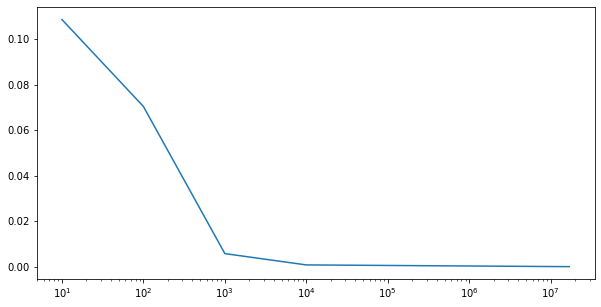

In [2]:
np.random.seed(1)
n = 2 # dimension
N = [10,100,1000,10000,16854788]
I_N = np.zeros(len(N))
alpha = 0.05
conf_intervals = np.zeros(len(N))
for idx,run in enumerate(N):
    X = np.random.uniform(low=-1,high=1,size=run*n).reshape(run,n)
    X_norm = np.sqrt(np.sum(X**2,axis=1))
    Z = (X_norm<1).astype(int)
    I_N[idx] = 4*sum(Z)/run
    sigma_Z = np.sqrt(np.pi/4*(1-np.pi/4))
    conf_intervals[idx] = 4*st.norm.ppf(1-alpha/2)*sigma_Z/np.sqrt(run)
    print(f"N = {run}: ",I_N[idx]-conf_intervals[idx],I_N[idx]+conf_intervals[idx], "value : ", I_N[idx])
## is equal to 1/4 of the result :-)

I = (np.pi)**(n/2)/(special.gamma(n/2+1))
fig,ax = plt.subplots(1,figsize=(10,5))
ax.plot(N,abs((I_N-I)/I))
ax.set_xscale("log")
fig.show()

## 2. Choosing the right N for the simulation

By Chebyshev inequality $P(|I_N-I|\geq \epsilon) \leq \frac{Var(I_N)}{\epsilon^2}$ where $Var(I_N) = Var(Z)/N$. 

Here, we want $\frac{Var(I_N)}{\epsilon^2} = \alpha \Leftrightarrow Var(Z)/N = \alpha \epsilon^2$ 

Therefore, $N = Var(Z)/(\alpha\epsilon^2)$

In [3]:
alpha = 1e-4
epsilon = 1e-2
N_cheb = (np.pi/4*(1-np.pi/4))/(epsilon**2*alpha)
int(N_cheb)

16854788

$P(|I_N-I|>\epsilon) = P(I_N-I>\epsilon) + P(I_N-I<-\epsilon) = P(\frac{(I_N-I)\sqrt{N}}{\sigma}>\frac{\epsilon\sqrt{N}}{\sigma})+P(\frac{(I_N-I)\sqrt{N}}{\sigma}<-\frac{\epsilon\sqrt{N}}{\sigma}) \leq 2\phi(-\frac{\epsilon\sqrt{N}}{\sigma}) +2UB$ where $UB = K\frac{E[|Z-\pi/4|^3]}{\sqrt{N}\sigma^3}$. 

Now, we want $2\phi(-\frac{\epsilon\sqrt{N}}{\sigma}) +2K\frac{E[|Z-\pi/4|^3]}{\sqrt{N}\sigma^3} = \alpha$

$E[|Z-\pi/4|^3] = p|1-p|^3 + (1-p)|0-p|^3 = p(1-p)[(1-p)^2+p^2]$

In [4]:
p = np.pi/4
third_mom = p*(1-p)*((1-p)**2+p**2)
sigma = np.sqrt(p*(1-p))
K=1/2

260722392.82392824

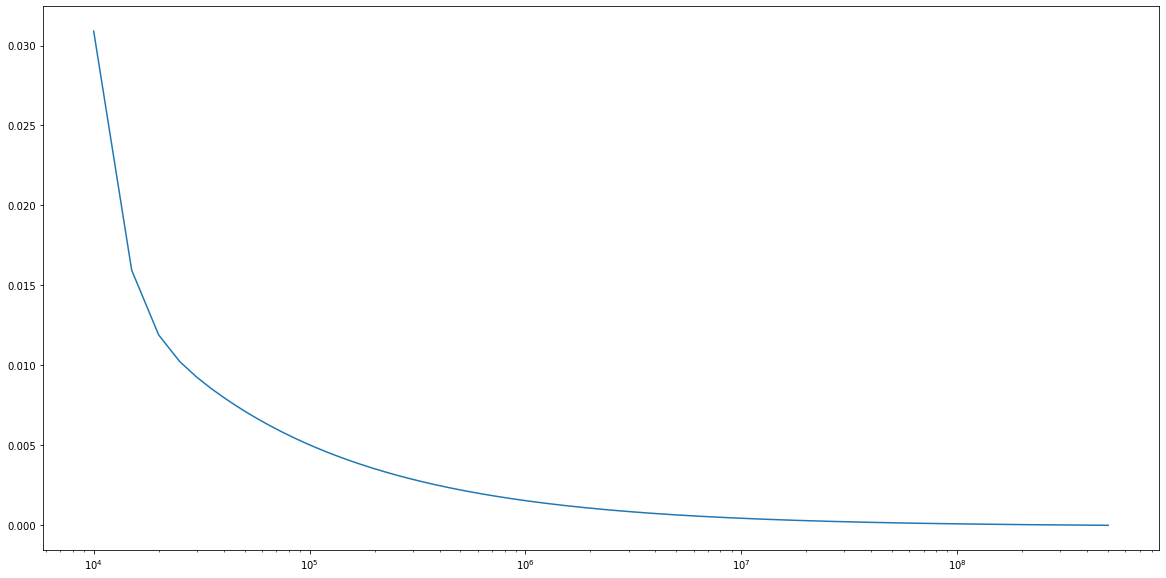

In [32]:
fig, ax = plt.subplots(1,figsize=(20,10))
X = np.linspace(1e4,5e8,100000)
ax.plot(X,2*st.norm.cdf(-epsilon*np.sqrt(X)/sigma)+2*K*third_mom/(np.sqrt(X)*sigma**3)-alpha)
ax.set_xscale("log")
Y = 2*st.norm.cdf(-epsilon*np.sqrt(X)/sigma)+2*K*third_mom/(np.sqrt(X)*sigma**3)-alpha

np.argmax(Y<0)
X[52143]